## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn as imb
import scipy as sp
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, HuberRegressor, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_validate, GridSearchCV

In [2]:
GRS = 42
np.random.seed(GRS)

In [3]:
df = pd.read_csv("data.csv")

## Exploration and Cleaning

In [4]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
columns_to_drop = []
columns_maybe_drop = []

The 'id' attribute is an artifact of the database and cannot hold valuable information for the task. We drop it.

In [8]:
columns_to_drop.append('id')

Also, the 'Year_Factor' gives information on the measurements rather than the building itself. Furthermore, future data points will not fit into any of the here given factors. We drop the column.

In [9]:
columns_to_drop.append('Year_Factor')

We look into the 'State_Factor' column.

In [10]:
df.loc[:, 'State_Factor'].value_counts()

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

That looks clean, but very imbalanced. Furthermore, it is possible that this column does not entail additional information on the energy usage, since climate factors are already given by the temp columns. For now we leave it as it is.

In [11]:
columns_maybe_drop.append('State_Factor')

Now we look into the columns 'building_class' and 'facility_type' to see if there are any errors.

In [12]:
df.loc[:, ('building_class', 'facility_type')].value_counts()

building_class  facility_type                            
Residential     Multifamily_Uncategorized                    39455
Commercial      Office_Uncategorized                         12512
                Education_Other_classroom                     3860
                Lodging_Hotel                                 2098
Residential     2to4_Unit_Building                            1893
Commercial      Commercial_Other                              1744
Residential     5plus_Unit_Building                           1273
Commercial      Warehouse_Nonrefrigerated                     1255
                Retail_Uncategorized                          1130
                Education_College_or_university               1056
                Nursing_Home                                   772
                Education_Uncategorized                        709
Residential     Mixed_Use_Commercial_and_Residential           672
Commercial      Lodging_Dormitory_or_fraternity_sorority       669
    

In [13]:
df.loc[:, 'facility_type'].value_counts().shape, df.loc[:, ('building_class', 'facility_type')].value_counts().shape

((60,), (60,))

There seem to be no errors. But we can see that 'facility_type' subcategorizes 'building_class'. Therefore, it we drop 'building_class' for now, since it does not provide additional information to 'facility_type'.

In [14]:
columns_to_drop.append('building_class')

We inspect the 'floor_area' column.

<Axes: >

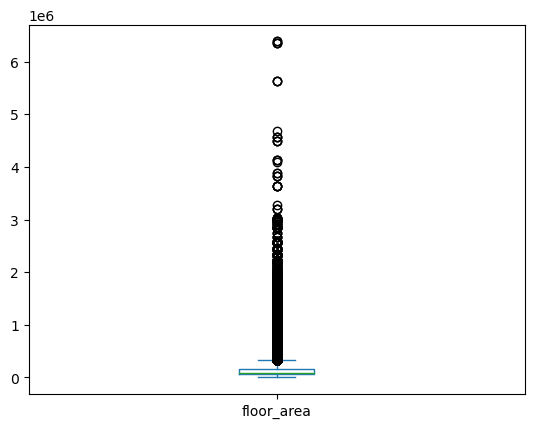

In [15]:
df.loc[:, 'floor_area'].plot(kind='box')

<Axes: ylabel='Density'>

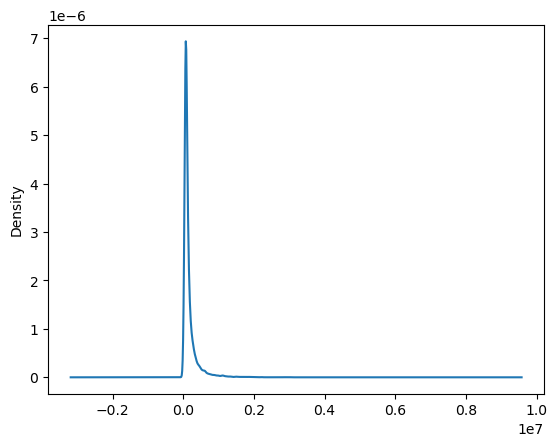

In [16]:
df.loc[:, 'floor_area'].plot(kind='density')

This is a very skewed distribution, but not surprising. We wont change it for now.

Now we look into 'year_built', since there are missing values.

In [17]:
df['year_built'].unique()

array([1942., 1955., 1951., 1980., 1985., 1956., 1982., 1947., 1929.,
       1979., 1927., 1960., 1924.,   nan, 1949., 1926., 1914., 1973.,
       1900., 1913., 1962., 1989., 1967., 1954., 1986., 1906., 1912.,
       1902., 1920., 1905., 1997., 1909., 2002., 1974., 1907., 1908.,
       1988., 1987., 1923., 1948., 1966., 1975., 1934., 1938., 1983.,
       2003., 1915., 1961., 1911., 1925., 1964., 1953., 1957., 2006.,
       1990., 1991., 1969., 1968., 1910., 1937., 1971., 1965., 1946.,
       1917., 1901., 2000., 2008., 1999., 1981., 2001., 1978., 1898.,
       1928., 1970., 1918., 1930., 1903., 1936., 1921., 1922., 1984.,
       1976., 1952., 1959., 1916., 1963., 1972., 1919., 1931., 1958.,
          0., 1994., 1940., 2010., 2009., 1889., 1939., 1945., 1904.,
       1932., 1941., 1977., 1993., 1992., 1950., 1944., 1935., 1996.,
       1995., 1933., 1943., 2007., 2005., 2004., 1869., 2011., 2012.,
       1864., 1998., 1895., 1896., 1875., 1880., 1888., 1897., 1891.,
       2013., 1887.,

Some samples have a value of 0 for the attribute 'year_built'. Since this seems to be an error, we will replace them with NaN.

In [18]:
df.loc[df['year_built'] == 0, 'year_built'] = np.nan

In [19]:
df['year_built'].isna().sum()

1843

Since the number of samples with NaN for 'year_built' is very small, we drop them.

In [20]:
df.dropna(subset=['year_built'], inplace=True)

Let us now look into the 'energy_star_rating', keeping in mind that there is a considerable amount of missing values.

array([ 11.,  45.,  97.,  46., 100.,  nan,  56.,  99.,  98.,  83.,  51.,
        81.,  29.,  13.,  93.,  59.,  82.,  53.,  60.,  26.,  44.,  55.,
        86.,  25.,  94.,  74.,  96.,  90.,  71.,  70.,  65.,  57.,  61.,
        54.,   6.,  75.,  73.,  91.,  92.,  85.,  88.,  89.,  67.,  78.,
        76.,  33.,  48.,  58.,  63.,  39.,  23.,  42.,  64.,  69.,  62.,
        84.,  24.,  80.,  15.,  95.,  66.,  72.,  87.,  79.,  77.,  27.,
        41.,  38.,  10.,  14.,  35.,   3.,   7.,  43.,  31.,   4.,  36.,
        49.,  17.,   0.,   1.,  40.,  50.,  12.,  37.,  32.,  22.,  34.,
        52.,  68.,   5.,  16.,  30.,  47.,   9.,  19.,   2.,  21.,  28.,
        18.,  20.,   8.])

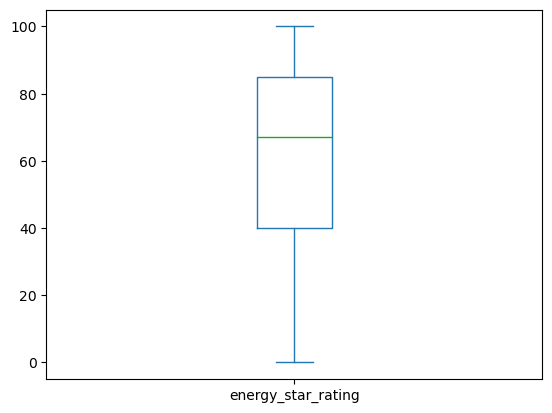

In [21]:
df.loc[:, 'energy_star_rating'].plot(kind='box')
df.loc[:, 'energy_star_rating'].unique()

The values seem error-free. Furthermore, an energy rating score is expected to give good information on energy consumption. We will impute the missing values.

We have a look at the 'ELEVATION' column.

array([  2.4,   1.8,  59.1, 120.1,  18.6,  45.7, 120.4,  62.5,  52.7,
         9.1,  15.8,  43.9,  13.1,  35.4,  15.2,  44.2,   3. ,  47.5,
       100.6, 213.4, 115.8,  56.1,  32.9, 205.7, 189. , 217.9, 189.3,
       210.3, 232. , 212.4, 165.5, 221. , 201.8, 232.6, 256. , 198.1,
       219.8,   3.4,  42.7,  25.6,  11.9,  21.9,  21.3,  10.7,  24.1,
        25. ,  24.4, 174. ,  18.3, 184.4,  95.1,  12.2, 131.1, 152.4,
       291.4, 114.3, 126.5, 269.7,  32. , 413.9, 470.3,  57.3,  26.5,
       313. ,  63.1,  36.6])

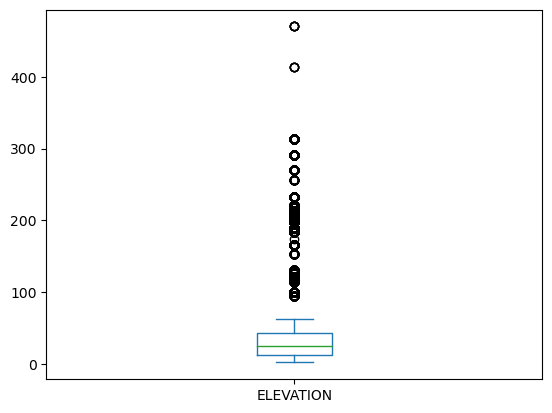

In [22]:
df.loc[:, 'ELEVATION'].plot(kind='box')
df.loc[:, 'ELEVATION'].unique()

<Axes: ylabel='Density'>

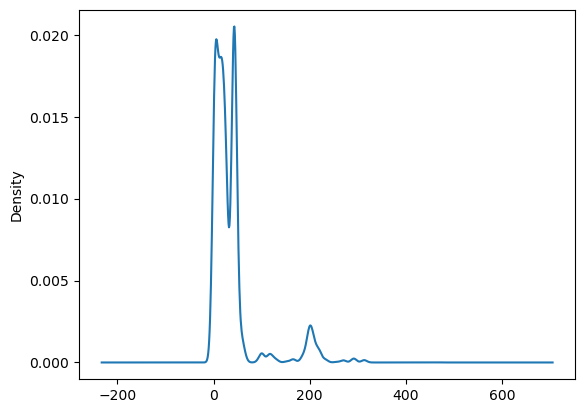

In [23]:
df.loc[:, 'ELEVATION'].plot(kind='density')

We again have a quite irregular distribution, but the values don't seem unreasonable.

We check if the 'avg_temp' column is consistent with the monthly'_avg_temp' column.

In [24]:
monthly_weights = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) / 365

In [25]:
difference = df['avg_temp'] - (df[df.columns[df.columns.str.endswith('_avg_temp')]] * monthly_weights).sum(axis=1)
print(difference)
print()
print('MSE: ', (difference**2).mean())

0        7.397318e-10
1        7.397318e-10
2        7.397318e-10
3        7.397318e-10
4        7.397318e-10
             ...     
75752   -2.047980e-02
75753   -2.047980e-02
75754   -1.718704e-02
75755   -1.718704e-02
75756   -3.769485e-02
Length: 73914, dtype: float64

MSE:  0.002979436315427322


This is good enough, we will drop the 'avg_temp' column in the pipeline, replace it by the mean, std, skewness and curtosis of the temperature and drop the original temperatur columns. We will experiment which of the four are actually useful.

Now we inspect the ..'_degree_days'.

cooling_degree_days  heating_degree_days
1489                 4252                   12998
1581                 4460                   10128
1128                 4875                    9072
1272                 4670                    8118
1277                 3978                    8070
260                  3772                    3197
430                  3742                    3176
1390                 5436                    2115
1331                 4335                    1611
1451                 4337                    1524
1570                 4138                    1369
1170                 4760                    1334
769                  6226                    1059
1319                 1823                     994
142                  2005                     986
1114                 5074                     853
497                  1477                     847
808                  5889                     844
1081                 5331                     818
1437     

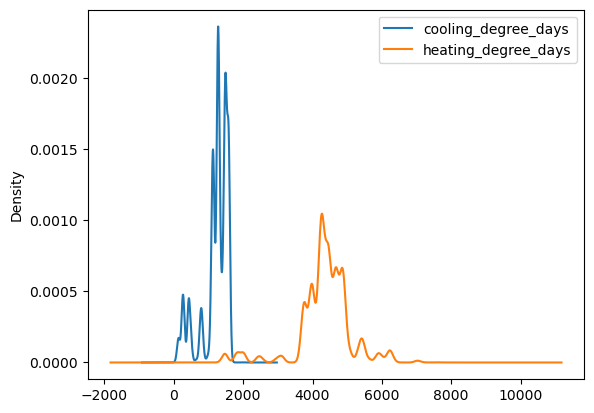

In [26]:
df.loc[:, df.columns.str.endswith('_degree_days')].plot(kind='density')
df.loc[:, df.columns.str.endswith('_degree_days')].value_counts()

The values seem error free. The ratio between both values could be interesting as it would encode the proportion between hot and cold days in another way.

Now we look into the ..'_inches' columns.

precipitation_inches  snowfall_inches  snowdepth_inches
42.17                 36.0             101                 12998
40.97                 49.1             463                 10128
53.79                 50.0             377                  9072
46.32                 29.6             64                   8118
38.51                 9.6              10                   8070
45.03                 1.4              1                    3197
39.35                 0.0              0                    3176
42.89                 27.3             154                  2115
72.81                 44.7             418                  1611
43.61                 14.8             12                   1524
37.12                 30.0             62                   1369
53.09                 31.6             39                   1334
41.75                 44.8             426                  1059
7.95                  0.0              0                     994
21.39                 0.0         

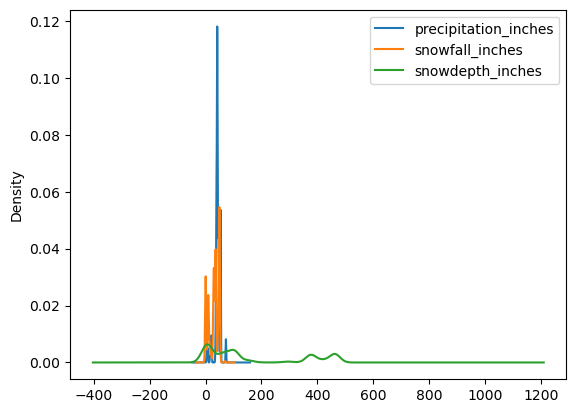

In [27]:
df.loc[:, df.columns.str.endswith('_inches')].plot(kind='density')
df.loc[:, df.columns.str.endswith('_inches')].value_counts()

<Axes: xlabel='snowfall_inches', ylabel='snowdepth_inches'>

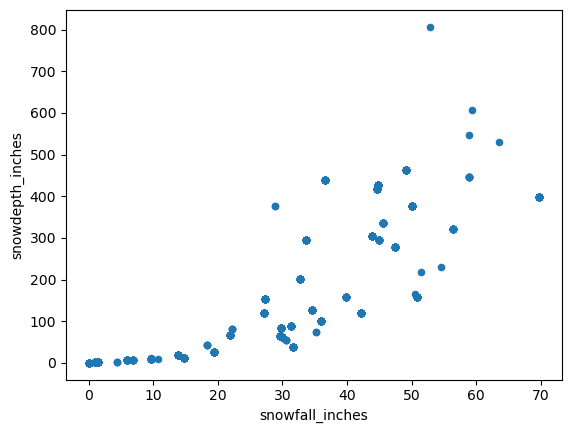

In [28]:
df.loc[:, df.columns.str.match('snow')].plot.scatter('snowfall_inches', 'snowdepth_inches')

<Axes: xlabel='snowfall_inches', ylabel='precipitation_inches'>

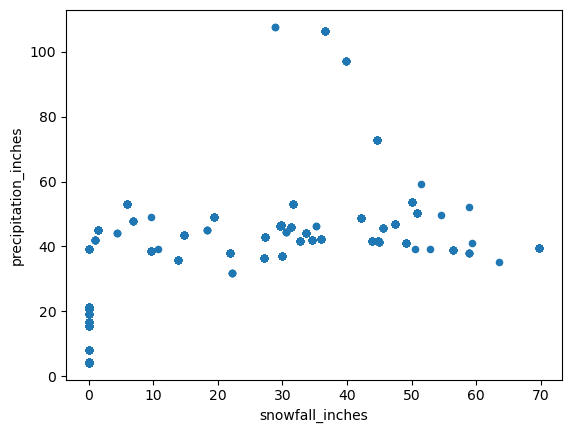

In [29]:
df.plot.scatter('snowfall_inches', 'precipitation_inches')

All columns seem okay, there is an obvious correlation between 'snowfall_inches' and 'snowdepth_inches'. It could be possible to drop one of them but we don't for now.

Now we have a look at the 'days_(above|below)'.. columns.

<Axes: >

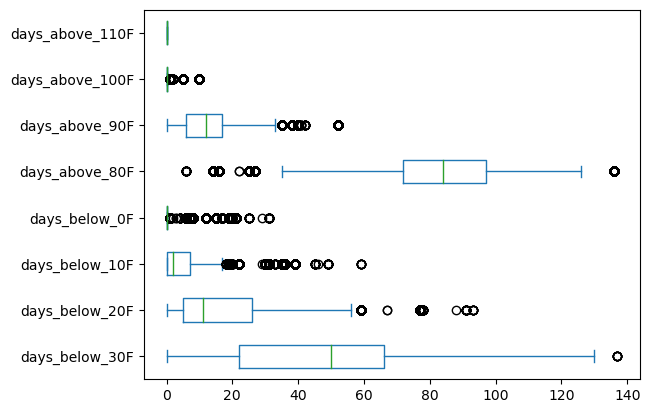

In [30]:
df.loc[:, df.columns.str.match('days_(above|below)')].plot(kind='box', vert=False)

These columns yield a more more fine-grained view on 'extreme' temperatures than the 'degree_days'. We keep them for now.

The wind related columns are very sparse. Lets first look into 'max_wind_speed' first before looking into the directions.

1.0     27015
18.3     3092
13.0     1258
17.0      931
19.2      694
13.4      483
17.4      316
20.6       80
23.3       47
Name: max_wind_speed, dtype: int64

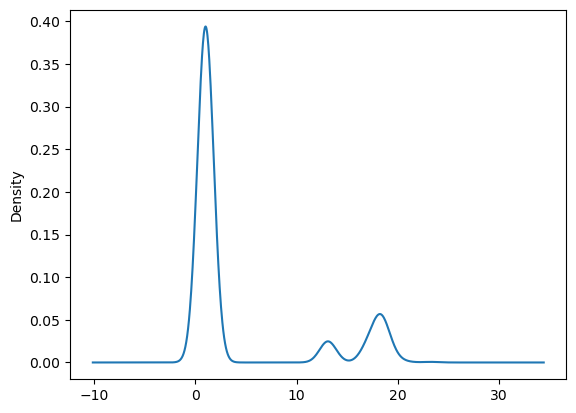

In [31]:
df.loc[:, 'max_wind_speed'].plot(kind='density')
df.loc[:, 'max_wind_speed'].value_counts()

More than 50% of the rows miss this value and more than 35% have the same value, 1.0. For now we keep it, but this might be a candidate for dropping.

In [32]:
columns_maybe_drop.append('max_wind_speed')

And now the directions.

1.0      27015
330.0     3006
310.0     2431
360.0      914
350.0      482
320.0       47
280.0       21
Name: direction_max_wind_speed, dtype: int64
1.0      27001
340.0     2929
360.0     1436
310.0     1258
320.0      483
330.0      102
350.0        3
Name: direction_peak_wind_speed, dtype: int64


<BarContainer object of 7 artists>

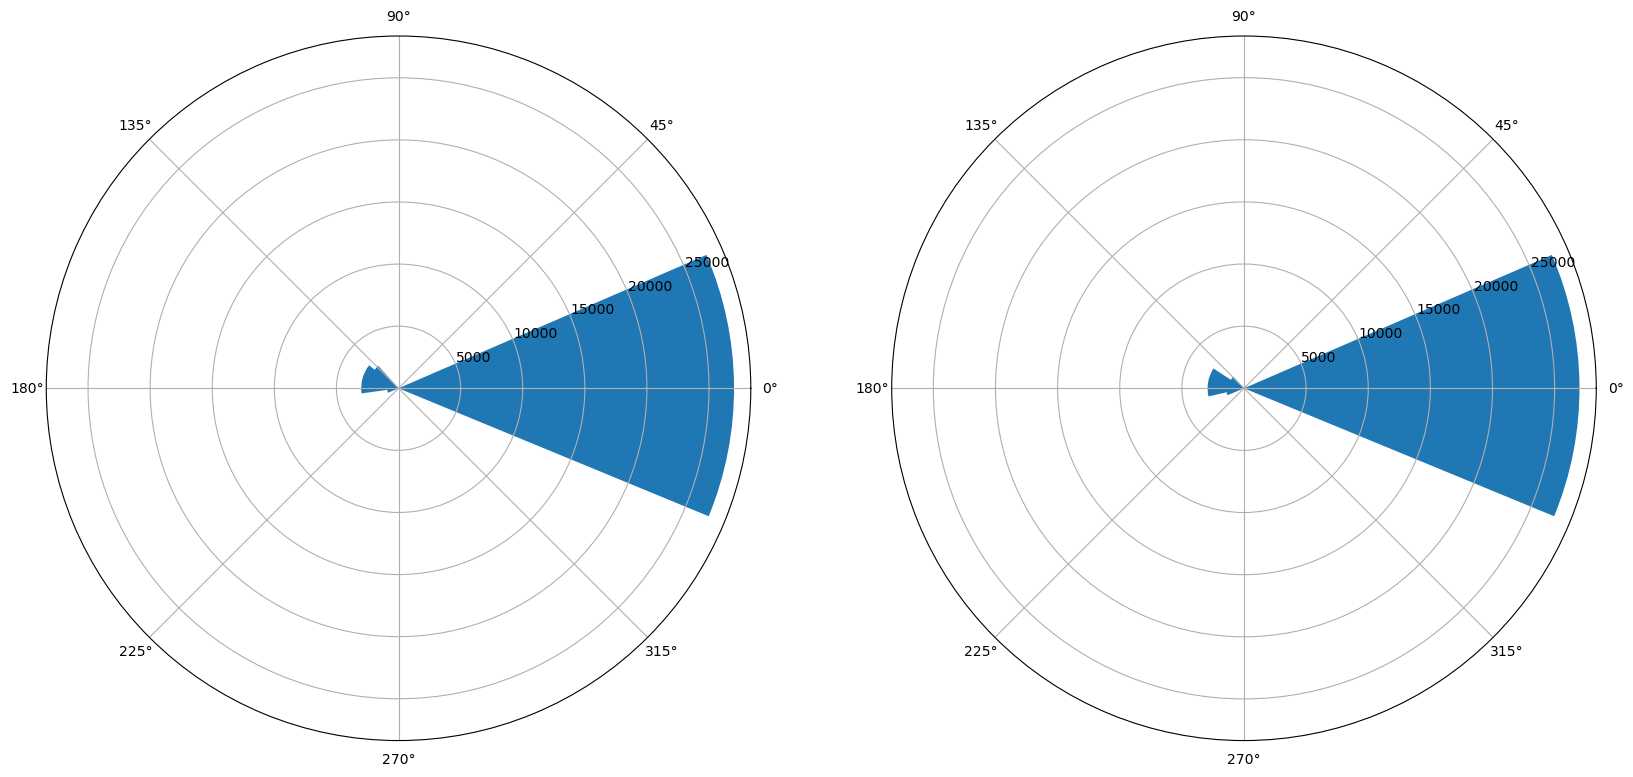

In [33]:
dm = df['direction_max_wind_speed'].value_counts()
print(dm)
dp = df['direction_peak_wind_speed'].value_counts()
print(dp)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 40), subplot_kw={'projection': 'polar'})
ax1.bar(dm.index * np.pi / 360, dm.values)
ax2.bar(dp.index * np.pi / 360, dp.values)

In [34]:
df.loc[:, ('direction_max_wind_speed', 'direction_peak_wind_speed')].corr()

,direction_max_wind_speed,direction_peak_wind_speed
direction_max_wind_speed,1.000000,0.999786
direction_peak_wind_speed,0.999786,1.000000


Thess distributions are heavily skewed towards 1.0. It is hard to say if this is just characteristic for directions of strong wind or measurement errores/defaults. It could be a good idea to drop them. Since their linear correlation is almost 1.0, we definitely drop one of them. But for now we keep one and represent it in the (sin, cos) way to better capture the circularity of direction.

In [35]:
columns_to_drop.append('direction_peak_wind_speed')
columns_maybe_drop.append('direction_max_wind_speed')

The last feature column remaining is 'days_with_fog'. It is very sparse with less than 40% of not missing values.

131.0    5373
99.0     4143
148.0    2613
56.0     2168
106.0    1962
79.0     1786
12.0     1625
110.0    1523
93.0     1410
104.0    1085
267.0     764
111.0     690
116.0     634
261.0     620
88.0      540
63.0      483
65.0      479
73.0      325
176.0     316
101.0     234
311.0     143
87.0       98
161.0      95
114.0      65
31.0       60
125.0      47
58.0       35
289.0      27
113.0      21
120.0      21
37.0        7
86.0        4
51.0        3
Name: days_with_fog, dtype: int64

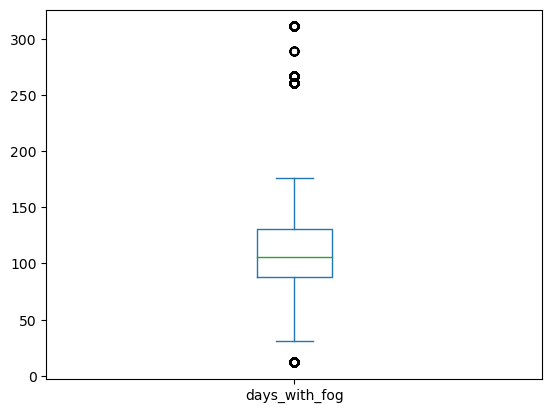

In [36]:
df['days_with_fog'].plot.box()
df['days_with_fog'].value_counts()

The existing value seem to be error free, so we will keep this column for now.

We finally drop all the duplicates and split the dataset into train and test set.

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(73914, 64)

In [39]:
X = df.drop('site_eui', axis=1)
y = df.loc[:, 'site_eui']
X.shape, y.shape

((73914, 63), (73914,))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=GRS)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59131, 63), (14783, 63), (59131,), (14783,))

## Preprocessing Pipeline

1. preprocessing
    1. column agregating and dropping
        1. monthly temperatures -> annual mean, std, skewness and curtosis
        2. heating, cooling -> heating/cooling ratio
        3. wind direction -> polar
        4. columns_to_drop -> drop
    3. process numerical
        1. replace NaN values with median
        2. polynomial features
        4. standardize
        5. pca for feature engineering and selection
    4. process categorical
        1. replace NaN values with most frequent
        2. one-hot encode

In [41]:
class AggregateMonthlyFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, drop=True):
        self.drop = drop
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.drop(columns='avg_temp')
        monthly_weights = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) / 365
        for suffix in ['min_temp', 'max_temp', 'avg_temp']:
            columns = X.columns[X.columns.str.endswith(suffix)]
            n = X[columns].shape[1]
            X['mean_' + suffix] = (X[columns] * monthly_weights).sum(axis=1)
            centr = X[columns] - np.repeat(X['mean_' + suffix].values.reshape(-1, 1), len(columns), 1)
            X['std_' + suffix] = ((centr**2 * monthly_weights).sum(axis=1) / (n-1))**0.5
            norm = X[columns] / np.repeat(X['std_' + suffix].values.reshape(-1, 1), len(columns), 1)
            X['skewness_' + suffix] = ((norm**3 * monthly_weights).mean(axis=1) / X['std_' + suffix]**3)
            X['curtosis_' + suffix] = ((norm**4 * monthly_weights).sum(axis=1) * (n*(n+1)/((n-1)*(n-2)*(n-3))))
            if self.drop:
                X = X.drop(columns=columns)
        return X

In [42]:
class MakeRatio(BaseEstimator, TransformerMixin):
    def __init__(self, drop=False):
        self.drop = drop
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        columns = X.columns
        X['ratio_' + '_'.join(columns)] = X[columns[0]] / X[columns[1]]
        if self.drop:
            X = X.drop(columns=columns)
        return X

In [43]:
class MakePolar(BaseEstimator, TransformerMixin):
    def __init__(self, drop=True):
        self.drop = drop
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if isinstance(X, pd.Series):
            X = X.to_frame()
        for column in X.columns:
            X['cos_' + column] = np.cos(X[column])
            X['sin_' + column] = np.sin(X[column])
        if self.drop:
            X = X.drop(columns=column)
        return X

In [44]:
class MakeDataFrame(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = pd.DataFrame(X).infer_objects()
        X.columns = list(range(X.shape[1]))
        return X

In [45]:
preselection = ColumnTransformer(
    [
        ('temp', AggregateMonthlyFeatures(drop=True), make_column_selector(pattern='temp')),
        ('degree_days', MakeRatio(drop=False), make_column_selector(pattern='_degree_days')),
        ('polar_coordinates', MakePolar(drop=True), 'direction_max_wind_speed'),
        ('drop', 'drop', columns_to_drop)
    ],
    remainder='passthrough'
)
numeric_transformer = Pipeline(
    steps=[
        ('replace_nan', SimpleImputer(strategy='median')),
        ('polynomial', PolynomialFeatures(interaction_only=True)),
        ('standardize', StandardScaler()),
        ('pca', PCA(50))
    ]
)
categorical_transformer = Pipeline(
    steps=[
        ('replace_nan', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)
type_specific_transformer = ColumnTransformer(
    [
        ('numeric_transformer', numeric_transformer, make_column_selector(dtype_include='number')),
        ('categorical_transformer', categorical_transformer, make_column_selector(dtype_exclude='number'))
    ]
)
preprocessing = Pipeline(
    steps=[
        ('preselection', preselection),
        ('reformat', MakeDataFrame()), # ColumnTransformer returns array, but make_column_selector requires dataframe
        ('dtype_specific', type_specific_transformer)
    ]
)

In [46]:
S_train = preprocessing.fit_transform(X_train)
preprocessing

Pipeline(steps=[('preselection',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('temp',
                                                  AggregateMonthlyFeatures(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026C3BC72B10>),
                                                 ('degree_days', MakeRatio(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026C3BC72D90>),
                                                 ('polar_coordinates',
                                                  MakePol...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026C344E2690>),
                                                 ('categorical_transformer',
                                                  Pipeline(steps=[('replace_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026C3BC4DA90>)]))])

In [47]:
S_train.shape

(59131, 117)

We now visualize the resulting features using t-SNE.

In [48]:
S_tsne = TSNE(random_state=GRS, perplexity=50, verbose=1).fit(S_train)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 59131 samples in 0.017s...
[t-SNE] Computed neighbors for 59131 samples in 30.652s...
[t-SNE] Computed conditional probabilities for sample 1000 / 59131
[t-SNE] Computed conditional probabilities for sample 2000 / 59131
[t-SNE] Computed conditional probabilities for sample 3000 / 59131
[t-SNE] Computed conditional probabilities for sample 4000 / 59131
[t-SNE] Computed conditional probabilities for sample 5000 / 59131
[t-SNE] Computed conditional probabilities for sample 6000 / 59131
[t-SNE] Computed conditional probabilities for sample 7000 / 59131
[t-SNE] Computed conditional probabilities for sample 8000 / 59131
[t-SNE] Computed conditional probabilities for sample 9000 / 59131
[t-SNE] Computed conditional probabilities for sample 10000 / 59131
[t-SNE] Computed conditional probabilities for sample 11000 / 59131
[t-SNE] Computed conditional probabilities for sample 12000 / 59131
[t-SNE] Computed conditional probabilities for s

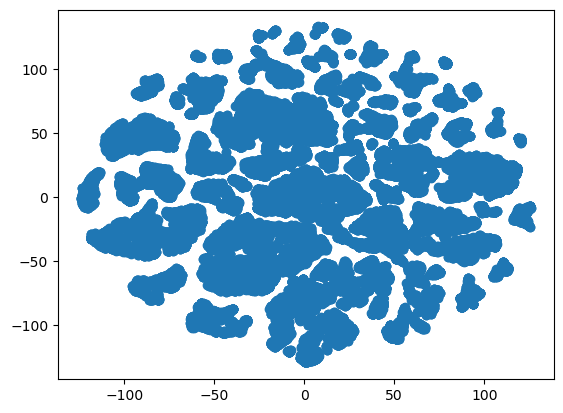

In [49]:
plt.scatter(S_tsne.embedding_[:, 0], S_tsne.embedding_[:, 1])

2. model selection
    1. linear regression (as a baseline)
    2. Elastic-Net (lasso + ridge)
    3. Huber regression
    4. random forest of regression trees

We apply cross validation on linear regression as a baseline.

In [50]:
cv_linear_regression = cross_validate(LinearRegression(), S_train, y_train, scoring='neg_root_mean_squared_error')

In [51]:
print('Linear regression score: ', cv_linear_regression['test_score'].mean())

Linear regression score:  -46.74031972858554


Now lets use cross validation to find the best hyperparameters for elastic-net and compare the results to standard linear regression.

In [52]:
alphas = np.logspace(-3, 3, 7)
l1_ratios = np.linspace(0.1, 0.9, 9)

In [53]:
cv_elastic_net = GridSearchCV(
    ElasticNet(max_iter=2*10**3), param_grid={'alpha': alphas, 'l1_ratio': l1_ratios}, cv=5, 
    scoring='neg_root_mean_squared_error', verbose=2
).fit(S_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   7.1s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=  10.3s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   8.2s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   7.5s
[CV] END ..........................alpha=0.001, l1_ratio=0.1; total time=   8.2s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   7.6s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   7.4s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   6.5s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   6.0s
[CV] END ..........................alpha=0.001, l1_ratio=0.2; total time=   9.4s
[CV] END ..........alpha=0.001, l1_ratio=0.30000000000000004; total time=   6.4s
[CV] END ..........alpha=0.001, l1_ratio=0.3000

C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.024e+05, tolerance: 1.549e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=  17.4s


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+05, tolerance: 1.628e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=  21.1s


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.585e+05, tolerance: 1.595e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=  16.8s
[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=  16.6s


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+06, tolerance: 1.601e+04
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.001, l1_ratio=0.9; total time=  24.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   1.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   1.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   1.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   1.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   1.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   1.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   1.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.9s
[CV] END ...........alpha=0.01, l1_ratio=0.30000000000000004; total time=   1.5s
[CV] END ...........alpha=0.

[CV] END ............alpha=1.0, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END ............alpha=1.0, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END ............alpha=1.0, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END ............alpha=1.0, l1_ratio=0.30000000000000004; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=0.4; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=0.4; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=0.4; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=0.4; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=0.4; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV] END ...................

[CV] END ..........................alpha=100.0, l1_ratio=0.5; total time=   0.1s
[CV] END ..........................alpha=100.0, l1_ratio=0.6; total time=   0.1s
[CV] END ..........................alpha=100.0, l1_ratio=0.6; total time=   0.1s
[CV] END ..........................alpha=100.0, l1_ratio=0.6; total time=   0.1s
[CV] END ..........................alpha=100.0, l1_ratio=0.6; total time=   0.1s
[CV] END ..........................alpha=100.0, l1_ratio=0.6; total time=   0.1s
[CV] END ...........alpha=100.0, l1_ratio=0.7000000000000001; total time=   0.1s
[CV] END ...........alpha=100.0, l1_ratio=0.7000000000000001; total time=   0.1s
[CV] END ...........alpha=100.0, l1_ratio=0.7000000000000001; total time=   0.1s
[CV] END ...........alpha=100.0, l1_ratio=0.7000000000000001; total time=   0.2s
[CV] END ...........alpha=100.0, l1_ratio=0.7000000000000001; total time=   0.2s
[CV] END ..........................alpha=100.0, l1_ratio=0.8; total time=   0.1s
[CV] END ...................

C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+05, tolerance: 1.988e+04
  model = cd_fast.enet_coordinate_descent(


In [54]:
cv_elastic_net.best_params_, cv_elastic_net.best_score_

({'alpha': 0.001, 'l1_ratio': 0.9}, -46.75419970419891)

In [55]:
cv_huber_regression = GridSearchCV(
    HuberRegressor(max_iter=2*10**3), param_grid={'alpha': alphas}, cv=5, 
    scoring='neg_root_mean_squared_error', verbose=2
).fit(S_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ........................................alpha=0.001; total time= 1.8min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ........................................alpha=0.001; total time= 1.8min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ........................................alpha=0.001; total time= 1.7min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ........................................alpha=0.001; total time= 1.8min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ........................................alpha=0.001; total time= 1.7min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .........................................alpha=0.01; total time= 1.7min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .........................................alpha=0.01; total time= 1.8min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .........................................alpha=0.01; total time= 1.9min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .........................................alpha=0.01; total time= 1.7min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .........................................alpha=0.01; total time= 1.8min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........................................alpha=0.1; total time= 1.9min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........................................alpha=0.1; total time= 1.7min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........................................alpha=0.1; total time= 1.9min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........................................alpha=0.1; total time= 1.9min


C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........................................alpha=0.1; total time= 1.8min
[CV] END ..........................................alpha=1.0; total time= 1.2min
[CV] END ..........................................alpha=1.0; total time= 1.2min
[CV] END ..........................................alpha=1.0; total time= 1.1min
[CV] END ..........................................alpha=1.0; total time= 1.2min
[CV] END ..........................................alpha=1.0; total time= 1.3min
[CV] END .........................................alpha=10.0; total time=  28.9s
[CV] END .........................................alpha=10.0; total time=  27.1s
[CV] END .........................................alpha=10.0; total time=  27.4s
[CV] END .........................................alpha=10.0; total time=  28.5s
[CV] END .........................................alpha=10.0; total time=  26.7s
[CV] END ........................................alpha=100.0; total time=   9.6s
[CV] END ...................

C:\Users\letzi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [56]:
cv_huber_regression.best_params_, cv_huber_regression.best_score_

({'alpha': 0.01}, -47.786638924318865)

And finally we try a random forest of regression trees.

In [57]:
cv_random_forest = GridSearchCV(
    RandomForestRegressor(n_jobs=-1), param_grid={'max_depth': [10, 25, None]}, cv=5, 
    scoring='neg_root_mean_squared_error', verbose=2
).fit(S_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .......................................max_depth=10; total time= 4.8min
[CV] END .......................................max_depth=10; total time= 4.8min
[CV] END .......................................max_depth=10; total time= 4.9min
[CV] END .......................................max_depth=10; total time= 5.6min
[CV] END .......................................max_depth=10; total time= 5.6min
[CV] END .......................................max_depth=25; total time=11.5min
[CV] END .......................................max_depth=25; total time=11.6min
[CV] END .......................................max_depth=25; total time=15.4min
[CV] END .......................................max_depth=25; total time= 8.9min
[CV] END .......................................max_depth=25; total time=12.4min
[CV] END .....................................max_depth=None; total time=20.5min
[CV] END .....................................max

In [61]:
cv_random_forest.best_params_, cv_random_forest.best_score_

({'max_depth': 25}, -45.905092668669184)

The best estimator is the random regression forest. We build the final pipeline and evaluate the model on the test set.

In [59]:
end_to_end = Pipeline(
    steps=[
        ('preprocessor', preprocessing),
        ('estimator', cv_random_forest.best_estimator_)
    ]
)

In [64]:
y_pred = end_to_end.predict(X_test)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))

In [65]:
print(f'Final test error (RMSE): {rmse:.3f}')

Final test error (RMSE): 43.543
